<a href="https://colab.research.google.com/github/2653319/book-example/blob/main/%E9%80%8F%E9%81%8E%E8%8E%8E%E5%A3%AB%E6%AF%94%E4%BA%9E%E5%8D%81%E5%9B%9B%E8%A1%8C%E8%A9%A9_%E9%A0%90%E6%B8%AC%E4%B8%8B%E4%B8%80%E5%80%8B%E5%96%AE%E8%A9%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第 4 週：預測下一個單詞

歡迎來到這個任務！在這周中，您了解瞭如何創建一個模型來預測文本序列中的下一個單詞，現在您將實現這樣的模型並使用莎士比亞十四行詩語料庫對其進行訓練，同時還創建一些輔助函數來預處理數據。


讓我們開始吧！

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
import tensorflow as tf

對於本作業，您將使用 [莎士比亞十四行詩數據集](https://www.opensourceshakespeare.org/views/sonnets/sonnet_view.php?range=viewrange&sonnetrange1=1&sonnetrange2=154)，其中包含提取的 2000 多行文本來自莎士比亞的十四行詩。

In [ ]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 49.1MB/s]


In [ ]:
# Define path for file with sonnets
SONNETS_FILE = './sonnets.txt'

# Read the data
with open('./sonnets.txt') as f:
    data = f.read()

# Convert to lower case and save as a list
corpus = data.lower().split("\n")

print(f"There are {len(corpus)} lines of sonnets\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])

There are 2159 lines of sonnets

The first 5 lines look like this:

from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou, contracted to thine own bright eyes,



## 標記文本

現在將 Tokenizer 擬合到語料庫並保存單詞總數。

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

將文本轉換為序列時，您可以像在本課程中所做的那樣使用 `texts_to_sequences` 方法。

在下一個分級功能中，您將需要一次處理該語料庫。鑑於此，重要的是要記住，將數據提供給此方法的方式會影響結果。檢查以下示例以使這一點更清楚。

語料庫的第一個示例是一個字符串，如下所示：

In [ ]:
corpus[0]

'from fairest creatures we desire increase,'

如果您將此文本直接傳遞給 `texts_to_sequences` 方法，您將得到意想不到的結果：

In [ ]:
tokenizer.texts_to_sequences(corpus[0])

[[],
 [],
 [58],
 [],
 [],
 [],
 [17],
 [6],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [17],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [6],
 [],
 [],
 [],
 [6],
 [],
 [],
 [],
 [],
 [17],
 [],
 [],
 []]


發生這種情況是因為 `texts_to_sequences` 需要一個列表，而您提供的是一個字符串。然而，字符串在 Python 中仍然是可迭代的，因此您將獲得字符串中每個字符的單詞索引。

相反，您需要將示例放在列表中，然後再將其傳遞給方法：

In [ ]:
tokenizer.texts_to_sequences([corpus[0]])

[[34, 417, 877, 166, 213, 517]]


請注意，您收到了包含在列表中的序列，因此為了僅獲得所需的序列，您需要顯式獲取列表中的第一項，如下所示：

In [ ]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[34, 417, 877, 166, 213, 517]

## 生成 n_grams

現在完成下面的 `n_gram_seqs` 函數。此函數接收擬合的標記器和語料庫（這是一個字符串列表），並應返回一個列表，其中包含語料庫中每一行的“n_gram”序列：

In [ ]:
# GRADED FUNCTION: n_gram_seqs
def n_gram_seqs(corpus, tokenizer):
    """
    生成 n-gram 序列列表
    
    Args:
        corpus (list of string): 用於生成 n-gram 的文本行
        tokenizer (object): 包含單詞索引字典的 Tokenizer 類的實例
    
    Returns:
        input_sequences (list of int): 語料庫中每一行的 n-gram 序列
    """
    input_sequences = []
    
    ### START CODE HERE
    for line in corpus:
	    token_list = tokenizer.texts_to_sequences([line])[0]
	    for i in range(1, len(token_list)):
		    n_gram_sequence = token_list[:i+1]
		    input_sequences.append(n_gram_sequence)

    ### END CODE HERE
    
    return input_sequences

In [ ]:
# Test your function with one example
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]

**Expected Output:**

```
n_gram sequences for first example look like this:

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]
```

In [ ]:
# 用更大的語料庫測試你的功能
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278]]

**Expected Output:**

```
n_gram sequences for next 3 examples look like this:

[[8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278]]
```

將 `n_gram_seqs` 轉換應用於整個語料庫並保存最大序列長度以供以後使用：

In [ ]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length 
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 15462
maximum length of sequences is: 11


**Expected Output:**

```
n_grams of input_sequences have length: 15462
maximum length of sequences is: 11
```


## 為序列添加填充

現在編寫 `pad_seqs` 函數，它將任何給定的序列填充到所需的最大長度。請注意，此函數接收序列列表，並應返回帶有填充序列的 numpy 數組：

In [ ]:
# GRADED FUNCTION: pad_seqs
def pad_seqs(input_sequences, maxlen):
    """
    將標記化的序列填充到相同的長度
    
    Args:
        input_sequences (list of int): tokenized sequences to pad
        maxlen (int): maximum length of the token sequences
    
    Returns:
        padded_sequences (array of int): tokenized sequences padded to the same length
    """
    ### START CODE HERE
    padded_sequences = np.array(pad_sequences(input_sequences, maxlen=maxlen, padding='pre'))
    return padded_sequences
    ### END CODE HERE

In [ ]:
# Test your function with the n_grams_seq of the first example
first_padded_seq = pad_seqs(first_example_sequence, len(first_example_sequence))
first_padded_seq

array([[  0,   0,   0,  34, 417],
       [  0,   0,  34, 417, 877],
       [  0,  34, 417, 877, 166],
       [ 34, 417, 877, 166, 213],
       [417, 877, 166, 213, 517]], dtype=int32)

**Expected Output:**

```
array([[  0,   0,   0,  34, 417],
       [  0,   0,  34, 417, 877],
       [  0,  34, 417, 877, 166],
       [ 34, 417, 877, 166, 213],
       [417, 877, 166, 213, 517]], dtype=int32)
```

In [ ]:
# Test your function with the n_grams_seq of the next 3 examples
next_3_padded_seq = pad_seqs(next_3_examples_sequence, max([len(s) for s in next_3_examples_sequence]))
next_3_padded_seq

array([[  0,   0,   0,   0,   0,   0,   8, 878],
       [  0,   0,   0,   0,   0,   8, 878, 134],
       [  0,   0,   0,   0,   8, 878, 134, 351],
       [  0,   0,   0,   8, 878, 134, 351, 102],
       [  0,   0,   8, 878, 134, 351, 102, 156],
       [  0,   8, 878, 134, 351, 102, 156, 199],
       [  0,   0,   0,   0,   0,   0,  16,  22],
       [  0,   0,   0,   0,   0,  16,  22,   2],
       [  0,   0,   0,   0,  16,  22,   2, 879],
       [  0,   0,   0,  16,  22,   2, 879,  61],
       [  0,   0,  16,  22,   2, 879,  61,  30],
       [  0,  16,  22,   2, 879,  61,  30,  48],
       [ 16,  22,   2, 879,  61,  30,  48, 634],
       [  0,   0,   0,   0,   0,   0,  25, 311],
       [  0,   0,   0,   0,   0,  25, 311, 635],
       [  0,   0,   0,   0,  25, 311, 635, 102],
       [  0,   0,   0,  25, 311, 635, 102, 200],
       [  0,   0,  25, 311, 635, 102, 200,  25],
       [  0,  25, 311, 635, 102, 200,  25, 278]], dtype=int32)

**Expected Output:**

```
array([[  0,   0,   0,   0,   0,   0,   8, 878],
       [  0,   0,   0,   0,   0,   8, 878, 134],
       [  0,   0,   0,   0,   8, 878, 134, 351],
       [  0,   0,   0,   8, 878, 134, 351, 102],
       [  0,   0,   8, 878, 134, 351, 102, 156],
       [  0,   8, 878, 134, 351, 102, 156, 199],
       [  0,   0,   0,   0,   0,   0,  16,  22],
       [  0,   0,   0,   0,   0,  16,  22,   2],
       [  0,   0,   0,   0,  16,  22,   2, 879],
       [  0,   0,   0,  16,  22,   2, 879,  61],
       [  0,   0,  16,  22,   2, 879,  61,  30],
       [  0,  16,  22,   2, 879,  61,  30,  48],
       [ 16,  22,   2, 879,  61,  30,  48, 634],
       [  0,   0,   0,   0,   0,   0,  25, 311],
       [  0,   0,   0,   0,   0,  25, 311, 635],
       [  0,   0,   0,   0,  25, 311, 635, 102],
       [  0,   0,   0,  25, 311, 635, 102, 200],
       [  0,   0,  25, 311, 635, 102, 200,  25],
       [  0,  25, 311, 635, 102, 200,  25, 278]], dtype=int32)
```

In [ ]:
# 填充整個語料庫
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (15462, 11)


**Expected Output:**

```
padded corpus has shape: (15462, 11)
```

## 將數據拆分為特徵和標籤

在將數據輸入神經網絡之前，您應該將其拆分為特徵和標籤。在這種情況下，特徵將是填充的 n_gram 序列，其中最後一個單詞被刪除，標籤將是被刪除的單詞。

完成下面的 `features_and_labels` 功能。此函數需要填充的 n_gram 序列作為輸入，並且應該返回一個包含特徵和一個熱編碼標籤的元組。

請注意，該函數還接收語料庫中的單詞總數，當對標籤進行熱編碼時，此參數將非常重要，因為語料庫中的每個單詞都至少是一個標籤。如果您需要刷新 `to_categorical` 函數的工作原理，請查看 [docs](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)

In [ ]:
# GRADED FUNCTION: features_and_labels
def features_and_labels(input_sequences, total_words):
    """
    從 n-gram 生成特徵和標籤
    
    Args:
        input_sequences (list of int): sequences to split features and labels from
        total_words (int): 詞彙量
    
    Returns:
        features, one_hot_labels (array of int, array of int): 特徵數組和 one-hot 編碼標籤
    """
    ### START CODE HERE
    features = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)
    ### END CODE HERE

    return features, one_hot_labels

In [ ]:
# 使用第一個示例的填充 n_grams_seq 測試您的函數
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (5, 3211)

features look like this:



array([[  0,   0,   0,  34],
       [  0,   0,  34, 417],
       [  0,  34, 417, 877],
       [ 34, 417, 877, 166],
       [417, 877, 166, 213]], dtype=int32)

**Expected Output:**

```
labels have shape: (5, 3211)

features look like this:

array([[  0,   0,   0,  34],
       [  0,   0,  34, 417],
       [  0,  34, 417, 877],
       [ 34, 417, 877, 166],
       [417, 877, 166, 213]], dtype=int32)
```

In [ ]:
# Split the whole corpus
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (15462, 10)
labels have shape: (15462, 3211)


**Expected Output:**

```
features have shape: (15462, 10)
labels have shape: (15462, 3211)
```

##創建模型

現在您應該定義一個能夠達到至少 80% 準確度的模型架構。

一些提示可以幫助您完成此任務：

- 第一層（嵌入）的適當 `output_dim` 為 100，這已經為您提供。
- 雙向 LSTM 有助於解決這個特定問題。
- 最後一層應該具有與語料庫中單詞總數相同的單元數和一個 softmax 激活函數。
- 這個問題可以只用兩層（不包括嵌入）來解決，所以先嘗試小型架構。

In [ ]:
# GRADED FUNCTION: create_model
tf.keras.backend.clear_session()
from tensorflow.keras.optimizers import RMSprop
def create_model(total_words, max_sequence_len):
    """
    Creates a text generator model
    
    Args:
        total_words (int): 嵌入層輸入的詞彙表大小
        max_sequence_len (int): 輸入序列的長度
    
    Returns:
        model (tf.keras Model): the text generator model
    """
    model = Sequential()
    ### START CODE HERE
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    #model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1000, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
    #model.add(tf.keras.layers.Dense(1000, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
        


    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    ### END CODE HERE

    return model

In [ ]:
# Get the untrained model
model = create_model(total_words, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 50s 15ms/step - loss: 6.8354 - accuracy: 0.0224
Epoch 2/50
484/484 [==============================] - 7s 15ms/step - loss: 6.4591 - accuracy: 0.0295
Epoch 3/50
484/484 [==============================] - 7s 15ms/step - loss: 6.2631 - accuracy: 0.0360
Epoch 4/50
484/484 [==============================] - 7s 15ms/step - loss: 6.0485 - accuracy: 0.0398
Epoch 5/50
484/484 [==============================] - 7s 15ms/step - loss: 5.7913 - accuracy: 0.0510
Epoch 6/50
484/484 [==============================] - 7s 15ms/step - loss: 5.5170 - accuracy: 0.0664
Epoch 7/50
484/484 [==============================] - 7s 15ms/step - loss: 5.2506 - accuracy: 0.0768
Epoch 8/50
484/484 [==============================] - 8s 16ms/step - loss: 4.9798 - accuracy: 0.0936
Epoch 9/50
484/484 [==============================] - 7s 15ms/step - loss: 4.6886 - accuracy: 0.1110
Epoch 10/50
484/484 [==============================] - 7s 15ms/step - loss: 4.3858 - accur


**要通過此作業，您的模型應達到至少 80% 的訓練準確率**。如果您的模型未達到此閾值，請嘗試使用不同的模型架構再次訓練，考慮增加“LSTM”層中的單元數量。

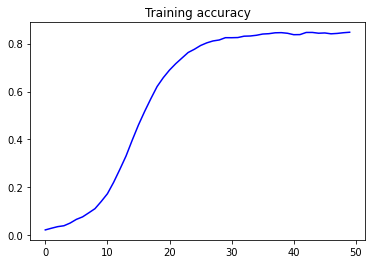

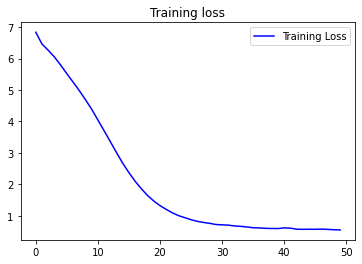

In [ ]:
# 查看模型的訓練曲線

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

在結束作業之前，請務必下載 `history.pkl` 文件，其中包含您模型的訓練歷史信息，並將用於計算您的成績。您可以通過運行以下單元格來下載此文件：

In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


## 看看你的模型在行動

完成所有工作後，終於到了查看模型生成文本的時候了。

運行下面的單元格以生成種子文本的下 100 個單詞。

提交作業後，我們鼓勵您嘗試針對不同數量的 epoch 進行訓練，並了解這如何影響生成文本的連貫性。還可以嘗試更改種子文本，看看你會得到什麼！

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	# Convert the text into sequences
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	# Pad the sequences
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# Get the probabilities of predicting a word
	predicted = model.predict(token_list, verbose=0)
	# Choose the next word based on the maximum probability
	predicted = np.argmax(predicted, axis=-1).item()
	# Get the actual word from the word index
	output_word = tokenizer.index_word[predicted]
	# Append to the current text
	seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of this place alone i that i live more dearly fall every worth is best is fall on me erred erred groan merits not new survey survey ' told thee love is not 'no ' slain slain slain bearing thee love alone all thy side kill'd halt halt fall so ill ' ' ' thy heart that grows doth heart doth oppress'd with staineth known injury of shade ' new ' ill be is due of thee that is thy 'will ' die fair that due so hate be so deem'd well heart can live begin live more lies more



您還需要提交此筆記本進行評分。要下載它，請單擊屏幕左上角的“文件”選項卡，然後單擊“下載”->“下載 .ipynb”。只要它是有效的 .ipynb (jupyter notebook) 文件，您就可以將其命名為任何您想要的名稱。

**恭喜你完成了本週的作業！**

您已經成功實現了一個能夠預測文本序列中下一個單詞的神經網絡！

**我們希望在下一個專業課程中見到您！保持！**